<a href="https://colab.research.google.com/github/thiago-Bmarques/da-ebac/blob/main/corinthians_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SOBRE O PROJETO:**
O Sport Club Corinthians Paulista, comumente referido como Corinthians ou pelo acrônimo SCCP, é um clube poliesportivo brasileiro da cidade de São Paulo. Fundado como uma equipe de futebol no dia 1º de setembro de 1910 por um grupo de operários do bairro Bom Retiro, o nome do clube foi inspirado no Corinthian Football Club de Londres, que excursionava pelo Brasil naquela época.

Com uma rica história e uma das maiores torcidas do Brasil, o Corinthians tem se destacado ao longo das décadas como um dos clubes mais vitoriosos e emblemáticos do futebol brasileiro. Este projeto se propõe a analisar o desempenho do Corinthians ao longo das últimas 10 temporadas, abrangendo o período de 18/05/2014 até 07/10/2023.

Para isso, utilizamos a base de dados do DANILO SOARES([link para dataset](https://www.kaggle.com/datasets/danilosoares/arena-corinthians)), que documenta 321 jogos do clube nesse intervalo de tempo. A análise focará no desempenho geral do clube durante essas 10 temporadas.

Os principais objetivos deste projeto são:

1. Avaliar o desempenho do Corinthians em diferentes competições.
2. Analisar a renda e o público ao longo dessas 10 temporadas.

Com isso, esperamos oferecer uma visão abrangente e detalhada sobre o desempenho do Corinthians, permitindo uma compreensão mais profunda dos fatores que influenciam seus resultados e destacando os momentos de sucesso e desafios enfrentados pelo clube.

---

# Pacotes e bibliotecas

In [ ]:
#Importando todas as bibliotecas que utilizaremos
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt




---



# Exploração de dados

In [ ]:
#Trazendo o arquivo 'A - Jogos.csv' que baixamos do dataset para um dataframe

jogos = 'A - Jogos.csv'

jogos_df = pd.read_csv(jogos)

#Selecionando as colunas no dataframe com as quais desejo trabalhar para a análise.
analise_jogos_df = jogos_df[['JOGO', 'RESULTADO', 'GOL COR',	'GOL VIS', 'ANO', 'CAMPEONATO' ,'TÉCNICO', 'PUBLICO','RENDA']]

#Note que a coluna 'RENDA' está em object e não em floats.

# covertendo a coluna 'RENDA' de object para floats
def converte_numero_br_para_float(numero_str):
    # Remove pontos que separam milhares
    numero_str = numero_str.replace('.', '')
    # Substitui vírgula decimal por ponto decimal
    numero_str = numero_str.replace(',', '.')
    # Converte para float
    return float(numero_str)

# Aplica a função à coluna 'numeros'
analise_jogos_df['RENDA'] = analise_jogos_df['RENDA'].apply(converte_numero_br_para_float)

#Agora, a coluna 'RENDA' está pronta para ser trabalhada.

---

# CORINTHIANS:



##gols feitos, sofridos e total de jogos:

gols feitos, gols sofridos e número total de jogos disputados:

In [ ]:
saldo_geral_df = pd.DataFrame({
    'gols feitos': [analise_jogos_df['GOL COR'].sum()],
    'gols sofridos': [analise_jogos_df['GOL VIS'].sum()],
    'jogos totais': [len(analise_jogos_df)]
})

saldo_geral_df

,gols feitos,gols sofridos,jogos totais
0,507,235,321


Analisando as 10 temporadas de 18/05/2014 a 07/10/2023, o Corinthians disputou 321 jogos, marcou 507 gols e sofreu apenas 235. Esses números destacam uma estatística positiva, com o time fazendo mais gols do que o número de partidas e sofrendo menos gols do que jogos disputados. Isso demonstra um desempenho ofensivo eficaz e uma defesa sólida ao longo desse período.



---



gols feitos, gols sofridos por ano:

In [ ]:
saldo_geral_por_ano_df = analise_jogos_df[["ANO", "GOL COR", 'GOL VIS']].groupby("ANO").agg("sum").reset_index()#somando os gols feitos e sofridos totais a cada ano e somando
saldo_geral_por_ano_df.head()

,ANO,GOL COR,GOL VIS
0,14,34,14
1,15,74,21
2,16,62,17
3,17,50,24
4,18,41,25


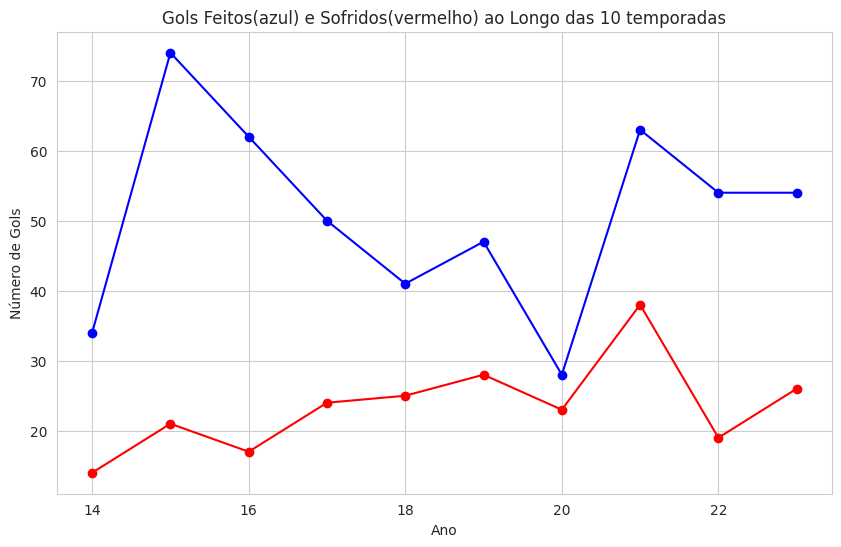

In [ ]:
# Plotando o gráfico de linhas
with sns.axes_style('whitegrid'):

  plt.figure(figsize=(10, 6))

  plt.plot(saldo_geral_por_ano_df['ANO'], saldo_geral_por_ano_df['GOL COR'], marker='o', linestyle='-', color='b', label='Gols Feitos')
  plt.plot(saldo_geral_por_ano_df['ANO'], saldo_geral_por_ano_df['GOL VIS'], marker='o', linestyle='-', color='r', label='Gols Sofridos')
  plt.title('Gols Feitos(azul) e Sofridos(vermelho) ao Longo das 10 temporadas')
  plt.xlabel('Ano')
  plt.ylabel('Número de Gols')

O gráfico de linhas revela uma tendência preocupante para o Corinthians: ao longo dos anos, o clube começou a sofrer mais gols e a marcar menos, embora ainda marque mais gols do que sofre. Esse padrão pode indicar uma fase de declínio no desempenho do time, refletindo desafios crescentes tanto na defesa quanto no ataque.



---



## vitórias, empates e derrotas:

todos os resultados ao longo das 10 temporadas:

In [ ]:
resultados_geral_df= analise_jogos_df['RESULTADO'].value_counts()
resultados_geral_df

RESULTADO
V    189
E     89
D     43
Name: count, dtype: int64

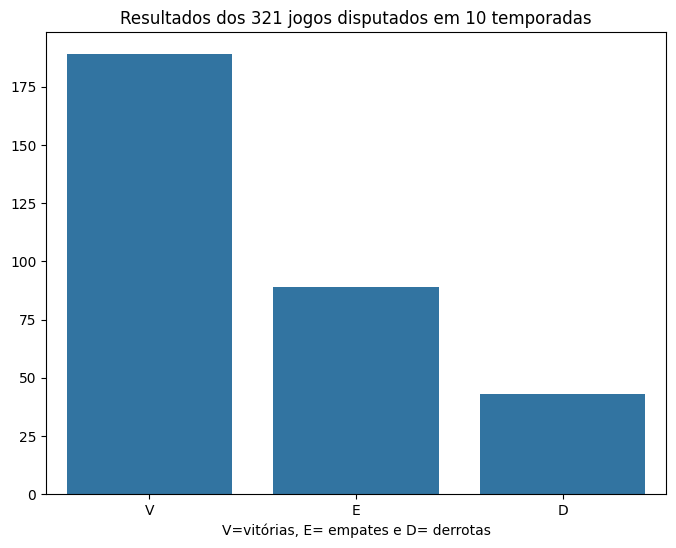

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=resultados_geral_df.index, y=resultados_geral_df.values,)
plt.title('Resultados dos 321 jogos disputados em 10 temporadas');
plt.xlabel('V=vitórias, E= empates e D= derrotas');

plt.show()

O gráfico de barras revela um desempenho sólido do Corinthians ao longo de 10 temporadas, totalizando 321 jogos. Durante este período, o clube venceu 189 jogos, mais da metade das partidas disputadas. Além disso, empatou 89 vezes e sofreu apenas 43 derrotas. Estes números destacam a consistência e a competitividade do Corinthians ao longo dos anos.





---



vitórias, empates e derrotas por ano:

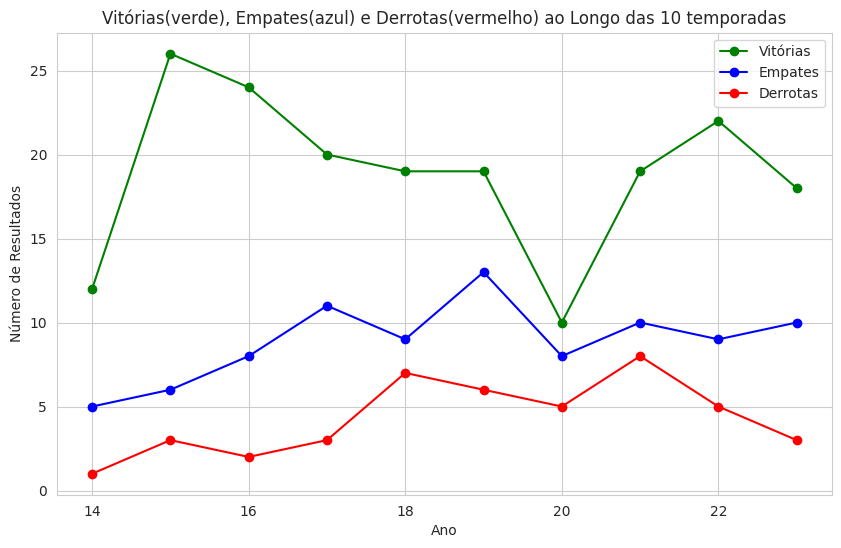

In [ ]:
# prompt: Gere um gráfico de linhas com vitórias, empates e derrotas por ano:

resultados_por_ano_df = analise_jogos_df.groupby(['ANO', 'RESULTADO']).size().unstack(fill_value=0)
resultados_por_ano_df.head()
# Plotando o gráfico de linhas
with sns.axes_style('whitegrid'):

  plt.figure(figsize=(10, 6))

  plt.plot(resultados_por_ano_df.index, resultados_por_ano_df['V'], marker='o', linestyle='-', color='g', label='Vitórias')
  plt.plot(resultados_por_ano_df.index, resultados_por_ano_df['E'], marker='o', linestyle='-', color='b', label='Empates')
  plt.plot(resultados_por_ano_df.index, resultados_por_ano_df['D'], marker='o', linestyle='-', color='r', label='Derrotas')
  plt.title('Vitórias(verde), Empates(azul) e Derrotas(vermelho) ao Longo das 10 temporadas')
  plt.xlabel('Ano')
  plt.ylabel('Número de Resultados')
  plt.legend()
  plt.show()

O gráfico de linhas revela uma tendência clara no desempenho do Corinthians ao longo dos anos. Observamos que, com o passar do tempo, o número de vitórias foi diminuindo enquanto os empates aumentaram.

O pico de vitórias ocorreu em 2015, um ano marcante para o clube, que nunca mais foi igualado. Em 2020, as linhas de vitórias, empates e derrotas ficaram muito próximas, indicando uma fase de instabilidade e má performance.

Essa regressão no desempenho ao longo dos anos destaca os desafios enfrentados pelo Corinthians, refletindo uma fase difícil e a necessidade de reavaliação e ajustes estratégicos para recuperar a competitividade.



---



saldo de gols por ano:

In [ ]:
saldo_gols_por_ano_df = analise_jogos_df.groupby('ANO')[['GOL COR', 'GOL VIS']].sum()
saldo_gols_por_ano_df['saldo_gols'] = saldo_gols_por_ano_df['GOL COR'] - saldo_gols_por_ano_df['GOL VIS']
saldo_gols_por_ano_df

,GOL COR,GOL VIS,saldo_gols
ANO,,,
14,34,14,20
15,74,21,53
16,62,17,45
17,50,24,26
18,41,25,16
19,47,28,19
20,28,23,5
21,63,38,25
22,54,19,35


Ao analisar o saldo de gols do Corinthians nas últimas 10 temporadas, observamos que o clube nunca teve um saldo negativo, o que demonstra uma consistência defensiva e ofensiva ao longo dos anos. No entanto, destacam-se alguns anos específicos. em 2020 obteve o saldo de gols foi o mais baixo, com apenas 5 gols, indicando um ano mais desafiador para a equipe. em 2015 O saldo de gols atingiu um impressionante número de 53, refletindo uma temporada excepcional. 2016 seguindo o sucesso do ano anterior, o saldo foi de 46, mantendo o alto desempenho.



---



## vitórias, empates e derrotas por campeonato:

In [ ]:
# Contando a quantidade de vitórias, empates e derrotas por campeonato
resultados_por_campeonato_Corinthians = analise_jogos_df.groupby(['CAMPEONATO', 'RESULTADO']).size().unstack(fill_value=0)
resultados_por_campeonato_Corinthians

RESULTADO,D,E,V
CAMPEONATO,,,
AMISTOSO,0,2,3
BRASILEIRO,22,56,100
COPA DO BRASIL,6,3,18
LIBERTADORES,6,4,12
PAULISTA,7,20,47
SULAMERICANA,2,4,9


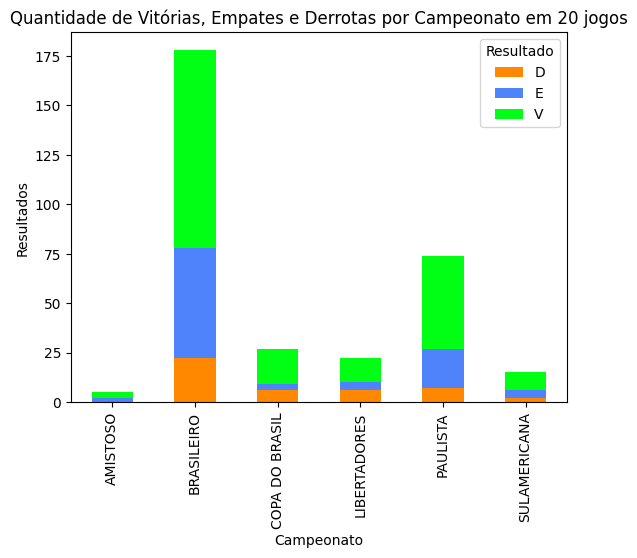

In [ ]:
#transformando os resultados_por_campeonato_carille em um grafico
cores = [ '#FF8800', '#4E83FC', '#00FF15']#paleta de cores
resultados_por_campeonato_Corinthians.plot(kind='bar', stacked=True, color= cores)
plt.xlabel('Campeonato')
plt.ylabel('Resultados')
plt.title('Quantidade de Vitórias, Empates e Derrotas por Campeonato em 20 jogos')
plt.legend(title='Resultado')
plt.show()

Analisando os dados das últimas 10 temporadas, o Corinthians obteve um número geral maior de vitórias em todas as competições disputadas. No entanto, é importante destacar que, nesse período, o clube conquistou apenas cinco títulos: dois Campeonatos Brasileiros e três Campeonatos Paulistas. Além disso, o Corinthians disputou apenas 22 jogos na Copa Libertadores, o que pode indicar dificuldades em avançar ou se classificar consistentemente para essa competição.



---



## Renda:

In [ ]:
#usando método describe para nos dar algumas informações sobre a coluna 'RENDA’
corinthians_renda_df = analise_jogos_df[['RENDA' ]].describe()

corinthians_renda_df

,RENDA
count,3.210000e+02
mean,1.674300e+06
std,1.049293e+06
min,0.000000e+00
25%,9.661247e+05
50%,1.671130e+06
75%,2.424755e+06
max,5.386292e+06


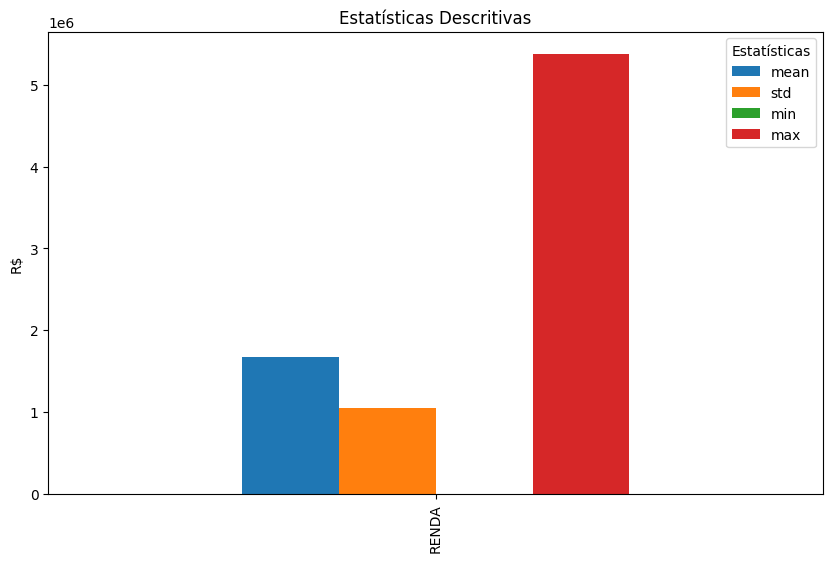

In [ ]:
#passandos as informaçoes do describe em um grafico vizualizavel aonde poderemos ver melhor as estatisticas
import matplotlib.pyplot as plt

# Transpor o DataFrame descrito para facilitar a plotagem
desc_transposed = corinthians_renda_df.T

# Plotar o gráfico de barras
desc_transposed[['mean', 'std', 'min', 'max']].plot(kind='bar', figsize=(10, 6))
plt.title('Estatísticas Descritivas')
#plt.xlabel('Colunas')
plt.ylabel('R$')
plt.legend(title='Estatísticas')
plt.show()

Ao analisar as informações, fica evidente que ao longo de 10 temporadas, o Corinthians gerou impressionantes 321 milhões apenas em renda de jogos. Esse número não apenas reflete a grandiosidade do clube, mas também ilustra o forte e contínuo apoio de sua vasta torcida.

Esse volume significativo de renda ressalta a capacidade do Corinthians de atrair e manter um público fiel, mesmo em períodos de desafio esportivo. É um testemunho não apenas da paixão dos torcedores, mas também da robustez financeira do clube, fundamental para sua sustentabilidade e crescimento no cenário esportivo nacional e internacional.



---



In [ ]:
renda_total = analise_jogos_df[["ANO", "RENDA"]].groupby("ANO").agg("sum").reset_index()#somando a renda totais a cada ano e somando
renda_total.head(10)

,ANO,RENDA
0,14,36510467.90
1,15,72573036.70
2,16,57199556.69
3,17,63696630.10
4,18,57846338.43
5,19,61955487.32
6,20,7353008.16
7,21,14579192.70
8,22,93231044.30
9,23,72505572.25


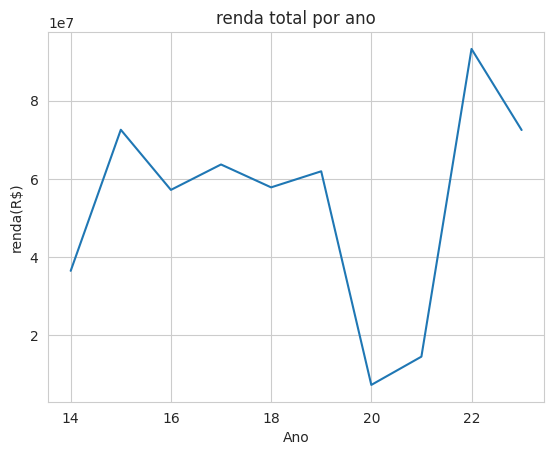

In [ ]:
with sns.axes_style('whitegrid'):

  grafico_renda = sns.lineplot(data=renda_total, x='ANO', y='RENDA')
  grafico_renda.set(title = 'renda total por ano', xlabel='Ano', ylabel='renda(R$)');

Ao observar o gráfico de barra e linha da renda do Corinthians ao longo de 10 temporadas, nota-se uma média consistentemente alta. Durante a pandemia, com jogos realizados sem público, houve uma queda na contabilização da renda. No entanto, logo após esse período, a renda do clube retomou sua trajetória ascendente, alcançando até mesmo recordes.

Este padrão reflete não apenas a forte base de torcedores do Corinthians, que continuaram apoiando financeiramente o clube mesmo durante desafios como a pandemia, mas também a capacidade de recuperação e crescimento do clube no retorno à normalidade. A alta média de renda evidencia a robustez financeira e o apoio contínuo da torcida, elementos cruciais para a sustentabilidade e o sucesso do Corinthians ao longo dos anos.

## Público:

In [ ]:
corinthians_puplico_df = analise_jogos_df[['PUBLICO' ]].describe()#faremos o mesmo com o público

corinthians_puplico_df

,PUBLICO
count,321.00000
mean,28.94790
std,14.21037
min,0.00000
25%,23.90300
50%,32.87700
75%,39.89700
max,46.51700


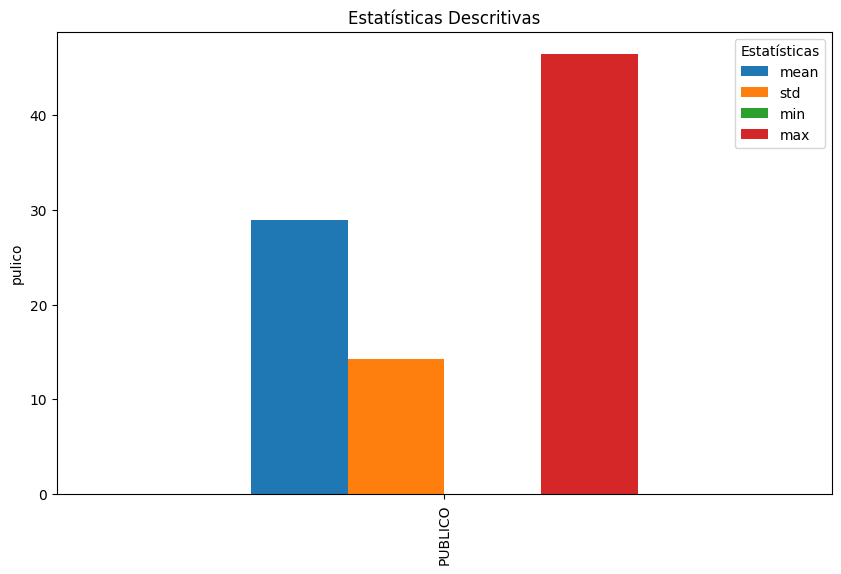

In [ ]:
import matplotlib.pyplot as plt

# Transpor o DataFrame descrito para facilitar a plotagem
desc_transposed = corinthians_puplico_df.T

# Plotar o gráfico de barras
desc_transposed[['mean', 'std', 'min', 'max']].plot(kind='bar', figsize=(10, 6),)
plt.title('Estatísticas Descritivas')
#plt.xlabel('Colunas')
plt.ylabel('pulico')
plt.legend(title='Estatísticas')
plt.show()

A análise do gráfico de público revela uma tendência consistente ao longo das últimas 10 temporadas, mostrando a forte presença e apoio contínuo da torcida do Corinthians. Este período registrou uma média robusta de público, destacando a devoção inabalável dos torcedores, independentemente das variações de desempenho da equipe em campo.

Essa consistência demonstra não apenas a paixão duradoura dos corinthianos pelo clube, mas também o papel crucial que a torcida desempenha na sustentação emocional e financeira do Corinthians.



---



In [ ]:
publico_total = analise_jogos_df[["ANO", "PUBLICO"]].groupby("ANO").agg("sum").reset_index()#somando o publico totais a cada ano e somando
publico_total.head(10)

,ANO,PUBLICO
0,14,556.618
1,15,1184.685
2,16,1028.645
3,17,1170.224
4,18,1129.310
5,19,1259.498
6,20,150.391
7,21,261.929
8,22,1361.619
9,23,1189.357


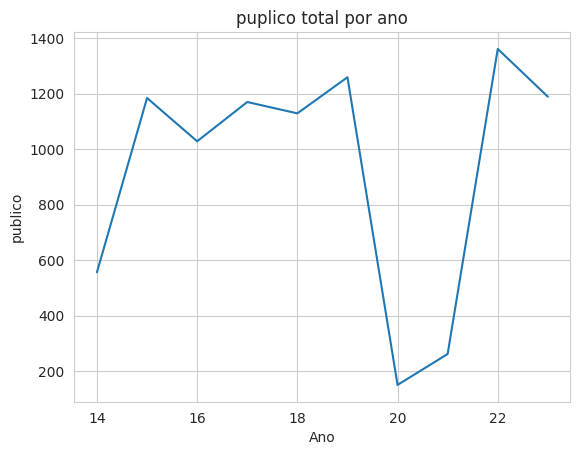

In [ ]:
with sns.axes_style('whitegrid'):

  grafico_puplico = sns.lineplot(data=publico_total, x='ANO', y='PUBLICO')
  grafico_puplico.set(title = 'puplico total por ano', xlabel='Ano', ylabel='publico');

O gráfico de linha que mostra a média de público nos jogos do Corinthians revela uma tendência geral de alta, refletindo o apoio contínuo e entusiástico da torcida. Esta média foi significativamente afetada pela pandemia, quando os jogos foram realizados sem a presença de torcedores nos estádios.

Durante os períodos normais, a média de público se manteve alta, demonstrando a paixão e o apoio inabalável dos torcedores corinthianos. No entanto, a pandemia causou uma queda abrupta na presença física nos estádios, alterando temporariamente essa métrica. Essa dinâmica evidencia não apenas a devoção da torcida, mas também a resiliência do clube em manter o engajamento dos torcedores mesmo em tempos adversos.

## Público e renda em todas as competições disputadas  

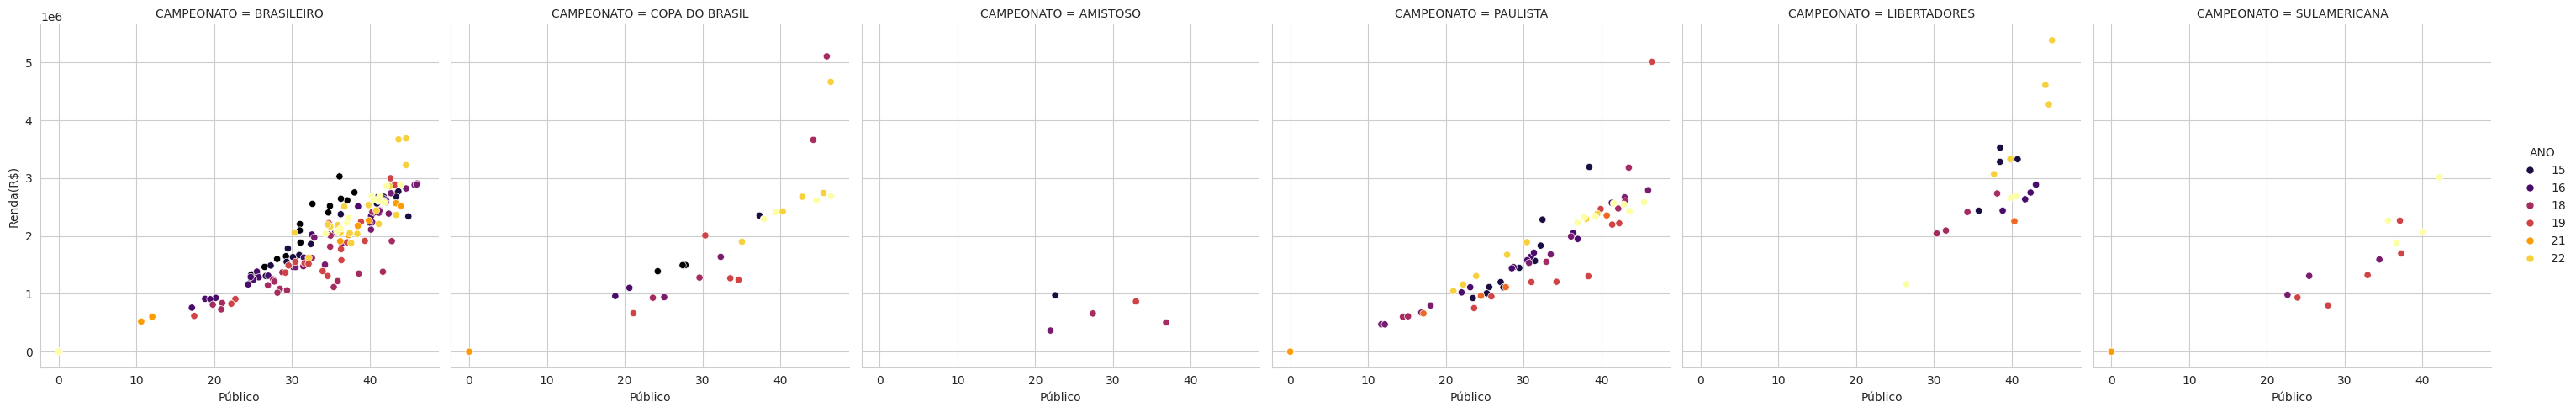

In [ ]:
#Gráfico mostrando o público e renda em todas as competições disputadas pelo Corinthians

with sns.axes_style('whitegrid'):#adicionado grids

  grafico_publico_renda_corinthians= sns.relplot(data=analise_jogos_df,x="PUBLICO", y="RENDA", hue="ANO", col="CAMPEONATO", palette= 'inferno')
  grafico_publico_renda_corinthians.set( xlabel='Público', ylabel='Renda(R$)');

Ao longo das últimas 10 temporadas, o gráfico de correlação entre público e renda em todas as competições disputadas pelo Corinthians revela uma tendência consistente: tanto o público presente nos estádios quanto a renda gerada nos jogos têm se mantido estáveis ou aumentado. Isso evidencia o potencial significativo do Corinthians em termos de visibilidade e rentabilidade.

Essa consistência sugere que o clube tem conseguido atrair e manter uma base sólida de torcedores que não apenas comparecem aos jogos, mas também apoiam financeiramente o clube. Isso é crucial não apenas para a sustentabilidade financeira, mas também para a projeção contínua da marca Corinthians como uma das mais fortes e reconhecidas no cenário esportivo brasileiro.

## Conlcusão:

Após uma análise abrangente dos dados, fica claro que o Corinthians demonstrou uma notável resiliência em relação ao apoio da torcida e à sua sustentabilidade financeira, mesmo em períodos de dificuldades esportivas ou de menor protagonismo.

Os gráficos analisados revelaram que, mesmo quando o time não estava em seu melhor momento competitivo ou não conquistava títulos, tanto a média de público quanto a renda nos jogos se mantiveram estáveis e próximas às observadas em períodos de maior sucesso esportivo. Isso indica que o vínculo emocional e a lealdade dos torcedores corinthianos transcendem os resultados em campo, permanecendo robustos mesmo em meio a regressões de desempenho ou quedas temporárias de protagonismo no cenário esportivo nacional.

Essa resiliência pode ser atribuída à paixão e devoção únicas da torcida corinthiana, que continuam a apoiar o clube incondicionalmente, independentemente das circunstâncias esportivas. Além disso, reflete a eficiência do Corinthians em manter sua base de torcedores engajada e sustentar sua saúde financeira mesmo em momentos desafiadores.

Insights Principais da Análise:
* **Estabilidade do Público e da Renda**: Os dados demonstraram que o Corinthians conseguiu manter uma média de público elevada e uma renda estável ao longo do período analisado, independentemente das flutuações de desempenho no campo.
* **Impacto da Torcida e Fidelidade Financeira**: A análise reforça que o apoio contínuo dos torcedores e sua contribuição financeira foram fundamentais para a sustentabilidade do clube, destacando a força da relação entre o Corinthians e sua base de fãs.

**Considerações Finais**:

Em suma, o projeto revela que o Corinthians não depende exclusivamente de resultados esportivos para manter seu status como um dos clubes mais amados e apoiados do Brasil. A resiliência demonstrada pela torcida e pela capacidade do clube em manter sua estabilidade financeira, mesmo em tempos difíceis, é um testemunho da força e da união que caracterizam a história e a identidade do Sport Club Corinthians Paulista.